In [1]:
##
## First, we will import all the necessary libraries that we will need in the code.
##
import pandas                   as pd
import numpy                    as np
import matplotlib               as mpl
import matplotlib.pyplot        as plt
import seaborn                  as sb
from   sklearn                  import preprocessing 
from   sklearn.model_selection  import train_test_split
from   sklearn.metrics          import classification_report, confusion_matrix
import itertools
from   sklearn                  import metrics
from   sklearn.metrics          import confusion_matrix
from   sklearn.metrics          import accuracy_score 
from   sklearn.metrics          import classification_report
import graphviz 
from   sklearn.model_selection  import learning_curve
from   numpy                    import loadtxt
import random  
from   sklearn.cluster          import KMeans 
from   keras.models             import Sequential
from   keras.layers             import Dense
import tensorflow               as tf
from   keras.utils              import plot_model
from   scipy.spatial.distance   import cdist
from   sklearn.decomposition    import PCA, FastICA
from   mlxtend.feature_selection import SequentialFeatureSelector as SFS
from   sklearn.linear_model     import LogisticRegression
from   sklearn.mixture          import GaussianMixture
from   sklearn.random_projection import GaussianRandomProjection as GRP
%matplotlib inline

Using TensorFlow backend.


In [38]:
##
## Provide the directory where metadata file is stored and read the file from that library. Displaying the initial few rows.
##
csv_path = 'D:/First Semester - MSBA - UTD/Kaggle Datasets for Practice/datasets-for-churn-telecom/cell2celltrain.csv'
churn_df = pd.read_csv(csv_path)
churn_df.head() # Displays the first 5 rows.

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [39]:
##
## Removing MonthlyRevenue from our dataframe.
##
churn_df.drop(['CustomerID','MonthlyRevenue','ServiceArea','HandsetPrice'], axis=1, inplace=True)
churn_df.head()

,Churn,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,No,0,4,No,0,Yes,1-Highest,Suburban,Professional,No
1,Yes,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,No,0,5,No,0,No,4-Medium,Suburban,Professional,Yes
2,No,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,No,0,6,No,0,No,3-Good,Town,Crafts,Yes
3,No,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,No,0,6,No,0,No,4-Medium,Other,Other,No
4,Yes,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,Yes,0,9,No,1,No,1-Highest,Other,Professional,Yes


In [40]:
##
## Replacing Churn field's value with 1 for Yes and 0 for No.
##
churn_df['Churn'] = churn_df['Churn'].replace(to_replace=['Yes', 'No'], value=[1,0])
churn_df['ChildrenInHH'] = churn_df['ChildrenInHH'].replace(to_replace=['Yes', 'No'], value=[1,0])
churn_df['HandsetRefurbished'] = churn_df['HandsetRefurbished'].replace(to_replace=['Yes', 'No'], value=[1,0])
churn_df['HandsetWebCapable'] = churn_df['HandsetWebCapable'].replace(to_replace=['Yes', 'No'], value=[1,0])
churn_df['TruckOwner'] = churn_df['TruckOwner'].replace(to_replace=['Yes', 'No'], value=[1,0])
churn_df['RVOwner'] = churn_df['RVOwner'].replace(to_replace=['Yes', 'No'], value=[1,0])
churn_df['Homeownership'] = churn_df['Homeownership'].replace(to_replace=['Known', 'Unknown'], value=[1,0])
churn_df['BuysViaMailOrder'] = churn_df['BuysViaMailOrder'].replace(to_replace=['Yes', 'No'], value=[1,0])
churn_df['RespondsToMailOffers'] = churn_df['RespondsToMailOffers'].replace(to_replace=['Yes', 'No'], value=[1,0])
churn_df['OptOutMailings'] = churn_df['OptOutMailings'].replace(to_replace=['Yes', 'No'], value=[1,0])
churn_df['NonUSTravel'] = churn_df['NonUSTravel'].replace(to_replace=['Yes', 'No'], value=[1,0])
churn_df['OwnsComputer'] = churn_df['OwnsComputer'].replace(to_replace=['Yes', 'No'], value=[1,0])
churn_df['HasCreditCard'] = churn_df['HasCreditCard'].replace(to_replace=['Yes', 'No'], value=[1,0])
churn_df['NewCellphoneUser'] = churn_df['NewCellphoneUser'].replace(to_replace=['Yes', 'No'], value=[1,0])
churn_df['OwnsMotorcycle'] = churn_df['OwnsMotorcycle'].replace(to_replace=['Yes', 'No'], value=[1,0])
churn_df['NotNewCellphoneUser'] = churn_df['NotNewCellphoneUser'].replace(to_replace=['Yes', 'No'], value=[1,0])
churn_df['MadeCallToRetentionTeam'] = churn_df['MadeCallToRetentionTeam'].replace(to_replace=['Yes', 'No'], value=[1,0])
churn_df['MaritalStatus'] = churn_df['MaritalStatus'].replace(to_replace=['Yes', 'No'], value=[1,0])

In [41]:
dummy2 = pd.get_dummies(churn_df['Occupation'])
dummy4 = pd.get_dummies(churn_df['CreditRating'])

churn_df = pd.concat([churn_df,dummy2,dummy4], axis=1)

##
## Removing MonthlyRevenue from our dataframe.
##
churn_df.drop(['CreditRating','PrizmCode','MaritalStatus','Occupation'], axis=1, inplace=True)

churn_df.head()

,Churn,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Retired,Self,Student,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
0,1,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,0,0,0,1,0,0,0,0,0,0
1,1,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,0,0,0,0,0,0,1,0,0,0
2,0,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,0,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,0,0,0,0,0,0,1,0,0,0
4,1,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [42]:
##
## Now let's check the statistical summary of the dataframe
##
churn_df[churn_df.isnull().any(axis=1)].count()
churn_df.dropna(inplace=True)
churn_df.shape

(49776, 65)

In [43]:
churn_df.drop(['ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'CallWaitingCalls', 
               'DroppedBlockedCalls'], axis=1, inplace=True)
churn_df.head()

,Churn,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Retired,Self,Student,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
0,1,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,0,0,0,1,0,0,0,0,0,0
1,1,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,0,0,0,0,0,0,1,0,0,0
2,0,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,0,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,0,0,0,0,0,0,1,0,0,0
4,1,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [53]:
#x_churn_df = churn_df[['MonthlyMinutes', 'RoamingCalls', 'DroppedCalls', 'CustomerCareCalls', 'ThreewayCalls', 'MonthsInService', 'CurrentEquipmentDays', 'HandsetWebCapable', 'HasCreditCard', 'IncomeGroup',
#'MadeCallToRetentionTeam', 'Clerical', 'Crafts', 'Homemaker', 'Other', 'Professional', 'Retired', 'Self', 'Student', 'No', 'Unknown', 'Yes']]
x_churn_df = churn_df.iloc[:,1:58]
y_churn_df = churn_df[['Churn']]
x_churn_df.head()

,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,...,Retired,Self,Student,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
0,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,...,0,0,0,1,0,0,0,0,0,0
1,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,...,0,0,0,0,0,0,1,0,0,0
2,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,...,0,0,0,0,0,0,1,0,0,0
4,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [54]:
names = churn_df.columns

scale = preprocessing.StandardScaler()

churn_norm_df = scale.fit_transform(churn_df)
churn_norm_df = pd.DataFrame(churn_norm_df, columns=names)

churn_norm_df.head(6)

,Churn,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Retired,Self,Student,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
0,1.578397,-0.579139,-1.045288,-0.288573,-0.413826,-0.124531,-0.568235,-0.452667,-0.587791,-0.311830,...,-0.121745,-0.133532,-0.087476,2.223536,-0.775792,-0.444915,-0.342683,-0.381359,-0.133766,-0.2072
1,1.578397,-0.974595,-1.255734,-0.400938,-0.413826,-0.124531,0.029792,0.029661,-0.632059,-0.376417,...,-0.121745,-0.133532,-0.087476,-0.449734,-0.775792,-0.444915,2.918147,-0.381359,-0.133766,-0.2072
2,-0.633554,-0.978380,-0.371859,-0.400938,-0.413826,-0.124531,0.037609,0.029661,-0.665261,-0.376417,...,-0.121745,-0.133532,-0.087476,-0.449734,-0.775792,2.247619,-0.342683,-0.381359,-0.133766,-0.2072
3,-0.633554,1.488962,1.185443,0.156393,-0.413826,-0.124531,0.659088,0.235286,5.089672,0.334044,...,-0.121745,-0.133532,-0.087476,-0.449734,-0.775792,-0.444915,2.918147,-0.381359,-0.133766,-0.2072
4,1.578397,-0.993517,-1.255734,-0.400938,-0.413826,-0.124531,0.045427,0.024584,-0.665261,-0.376417,...,-0.121745,-0.133532,-0.087476,2.223536,-0.775792,-0.444915,-0.342683,-0.381359,-0.133766,-0.2072
5,-0.633554,0.296918,0.217390,-0.288573,-0.413826,-0.124531,0.623910,-0.049034,0.330785,-0.219562,...,-0.121745,-0.133532,-0.087476,-0.449734,-0.775792,2.247619,-0.342683,-0.381359,-0.133766,-0.2072


In [55]:
names = x_churn_df.columns

scale = preprocessing.StandardScaler()

x_churn_norm_df = scale.fit_transform(x_churn_df)
x_churn_norm_df = pd.DataFrame(x_churn_norm_df, columns=names)

x_churn_norm_df.head(6)

,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,...,Retired,Self,Student,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
0,-0.579139,-1.045288,-0.288573,-0.413826,-0.124531,-0.568235,-0.452667,-0.587791,-0.311830,-0.565968,...,-0.121745,-0.133532,-0.087476,2.223536,-0.775792,-0.444915,-0.342683,-0.381359,-0.133766,-0.2072
1,-0.974595,-1.255734,-0.400938,-0.413826,-0.124531,0.029792,0.029661,-0.632059,-0.376417,-0.658616,...,-0.121745,-0.133532,-0.087476,-0.449734,-0.775792,-0.444915,2.918147,-0.381359,-0.133766,-0.2072
2,-0.978380,-0.371859,-0.400938,-0.413826,-0.124531,0.037609,0.029661,-0.665261,-0.376417,-0.728102,...,-0.121745,-0.133532,-0.087476,-0.449734,-0.775792,2.247619,-0.342683,-0.381359,-0.133766,-0.2072
3,1.488962,1.185443,0.156393,-0.413826,-0.124531,0.659088,0.235286,5.089672,0.334044,1.227803,...,-0.121745,-0.133532,-0.087476,-0.449734,-0.775792,-0.444915,2.918147,-0.381359,-0.133766,-0.2072
4,-0.993517,-1.255734,-0.400938,-0.413826,-0.124531,0.045427,0.024584,-0.665261,-0.376417,-0.728102,...,-0.121745,-0.133532,-0.087476,2.223536,-0.775792,-0.444915,-0.342683,-0.381359,-0.133766,-0.2072
5,0.296918,0.217390,-0.288573,-0.413826,-0.124531,0.623910,-0.049034,0.330785,-0.219562,-0.393540,...,-0.121745,-0.133532,-0.087476,-0.449734,-0.775792,2.247619,-0.342683,-0.381359,-0.133766,-0.2072


In [56]:
y_churn_df.shape

(49776, 1)

In [57]:
x_train_churn, x_test_churn, y_train_churn, y_test_churn = train_test_split(x_churn_norm_df, y_churn_df,test_size=0.3, random_state=16)

In [58]:
x_train_c = np.asarray(x_train_churn)
y_train_c = np.asarray(y_train_churn)

x_test_c  = np.asarray(x_test_churn)
y_test_c  = np.asarray(y_test_churn)

In [59]:
x_churn_norm_df.shape

(49776, 57)

In [60]:
y_churn = y_churn_df['Churn']
y_churn_df.head()

,Churn
0,1
1,1
2,0
3,0
4,1


### Feature Selection using Backward Ellimination Process

In [16]:
sbs_back = SFS(LogisticRegression(), k_features=14, forward=False, floating=False, scoring = 'accuracy', cv=0)

In [17]:
sbs_back.fit(x_train_c, y_train_c)

C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=LogisticRegression(C=1.0, class_weight=None,
                                                       dual=False,
                                                       fit_intercept=True,
                                                       intercept_scaling=1,
                                                       l1_ratio=None,
                                                       max_iter=100,
                                                       multi_class='warn',
                                                       n_jobs=None,
                                                       penalty='l2',
                                                       random_state=None,
                                                       solver='warn',
                                                       tol=0.0001, verbose=0,
                                                       warm_start=False),


In [18]:
sbs_back.k_feature_names_

('0', '3', '5', '6', '8', '14', '15', '17', '19', '21', '22', '23', '41', '52')

### Creating dataset based on the results from Backward ellimination process

In [66]:
x_churn_norm_back_df = x_churn_norm_df.iloc[:,[0,3,5,6,8,14,15,17,19,21,22,23,41,52]]
x_churn_norm_back_df.tail()

,MonthlyMinutes,OverageMinutes,PercChangeMinutes,PercChangeRevenues,BlockedCalls,UniqueSubs,ActiveSubs,HandsetModels,AgeHH1,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,MadeCallToRetentionTeam,3-Good
49771,-0.849714,-0.413826,0.045427,0.029661,-0.284149,-0.431718,-0.525425,-0.616521,0.754147,1.747309,-0.401295,0.328528,-0.183531,-0.444915
49772,-0.874312,0.033723,-0.103103,-0.305430,-0.376417,-0.431718,-0.525425,-0.616521,1.206870,-0.572308,-0.401295,0.328528,-0.183531,2.247619
49773,0.376388,-0.372194,-0.110920,-0.021110,-0.284149,-0.431718,-0.525425,-0.616521,0.844692,-0.572308,-0.401295,-3.043881,-0.183531,-0.444915
49774,-0.266938,2.188202,0.045427,0.029661,-0.284149,-0.431718,-0.525425,0.487084,-0.422931,-0.572308,-0.401295,0.328528,-0.183531,-0.444915
49775,2.308255,0.054539,0.522285,0.433294,-0.311830,-0.431718,-0.525425,0.487084,0.754147,1.747309,-0.401295,0.328528,-0.183531,2.247619


In [67]:
churn_norm_back_df = pd.concat([x_churn_norm_back_df, y_churn_df['Churn']],axis=1)
train_churn, test_churn = train_test_split(churn_norm_b_df, test_size=0.3, random_state=16)

,MonthlyMinutes,OverageMinutes,PercChangeMinutes,PercChangeRevenues,BlockedCalls,UniqueSubs,ActiveSubs,HandsetModels,AgeHH1,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,MadeCallToRetentionTeam,3-Good,Churn
51029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
51030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
51031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
51032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
51033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
51035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
51037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
51040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
51041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
51043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [77]:
churn_norm_back_df.tail(10)

,MonthlyMinutes,OverageMinutes,PercChangeMinutes,PercChangeRevenues,BlockedCalls,UniqueSubs,ActiveSubs,HandsetModels,AgeHH1,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,MadeCallToRetentionTeam,3-Good,Churn
49765,0.147440,-0.403418,-2.311502,-2.750074,-0.007346,-0.431718,-0.525425,3.797902,-1.418921,-0.572308,2.491934,0.328528,-0.183531,-0.444915,0.0
49766,-0.874312,-0.413826,0.096239,0.047431,-0.376417,-0.431718,-0.525425,-0.616521,-1.418921,-0.572308,-0.401295,0.328528,-0.183531,2.247619,0.0
49767,0.115273,0.626985,0.405024,1.019704,0.020334,-0.431718,-0.525425,1.590690,-0.332387,-0.572308,-0.401295,0.328528,-0.183531,2.247619,0.0
49768,-0.940537,-0.413826,0.045427,0.029661,-0.376417,0.384028,-0.525425,0.487084,-1.418921,-0.572308,-0.401295,0.328528,-0.183531,-0.444915,0.0
49769,-0.967027,-0.413826,0.006340,0.055047,-0.376417,-0.431718,-0.525425,0.487084,-1.418921,-0.572308,-0.401295,0.328528,5.448673,-0.444915,0.0
49770,-0.388034,-0.195256,-0.212546,-0.181040,-0.164201,0.384028,0.971373,-0.616521,0.210880,-0.572308,-0.401295,0.328528,-0.183531,-0.444915,0.0
49771,-0.849714,-0.413826,0.045427,0.029661,-0.284149,-0.431718,-0.525425,-0.616521,0.754147,1.747309,-0.401295,0.328528,-0.183531,-0.444915,0.0
49772,-0.874312,0.033723,-0.103103,-0.305430,-0.376417,-0.431718,-0.525425,-0.616521,1.206870,-0.572308,-0.401295,0.328528,-0.183531,2.247619,0.0
49773,0.376388,-0.372194,-0.110920,-0.021110,-0.284149,-0.431718,-0.525425,-0.616521,0.844692,-0.572308,-0.401295,-3.043881,-0.183531,-0.444915,0.0
49775,2.308255,0.054539,0.522285,0.433294,-0.311830,-0.431718,-0.525425,0.487084,0.754147,1.747309,-0.401295,0.328528,-0.183531,2.247619,0.0


In [75]:
churn_norm_back_df[churn_norm_back_df.isnull().any(axis=1)].count()
churn_norm_back_df.dropna(inplace=True)

In [76]:
train = np.asarray(train_churn)
test = np.asarray(test_churn)
test_churn.describe()

,MonthlyMinutes,OverageMinutes,PercChangeMinutes,PercChangeRevenues,BlockedCalls,UniqueSubs,ActiveSubs,HandsetModels,AgeHH1,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,MadeCallToRetentionTeam,3-Good,Churn
count,14971.000000,14971.000000,14971.000000,14971.000000,14971.000000,14971.000000,14971.000000,14971.000000,14971.000000,14971.000000,14971.000000,14971.000000,14971.000000,14971.000000,14927.000000
mean,0.008152,0.000070,-0.000235,-0.003526,-0.000516,0.003971,0.005068,0.000336,-0.002139,0.000353,0.003576,-0.003059,0.004573,-0.010757,0.287332
std,1.025619,1.032843,0.978699,0.940189,0.982576,0.719729,0.942178,1.015002,1.001810,1.000240,1.003758,1.004173,1.011990,0.990231,0.452533
min,-0.993517,-0.413826,-15.100673,-28.090094,-0.376417,-0.431718,-2.022223,-0.616521,-1.418921,-0.572308,-0.401295,-3.043881,-0.183531,-0.444915,0.000000
25%,-0.688883,-0.413826,-0.282902,-0.142961,-0.376417,-0.431718,-0.525425,-0.616521,-1.418921,-0.572308,-0.401295,0.328528,-0.183531,-0.444915,0.000000
50%,-0.300996,-0.382602,0.025883,0.022046,-0.284149,-0.431718,-0.525425,-0.616521,0.210880,-0.572308,-0.401295,0.328528,-0.183531,-0.444915,0.000000
75%,0.370711,0.002499,0.307308,0.070279,-0.035027,0.384028,0.971373,0.487084,0.754147,-0.572308,-0.401295,0.328528,-0.183531,-0.444915,1.000000
max,12.930690,30.560719,8.316174,18.223603,20.752876,13.435963,9.952164,10.419536,3.063032,1.747309,2.491934,0.328528,5.448673,2.247619,1.000000


### K-Means Algorithm on normal dataset

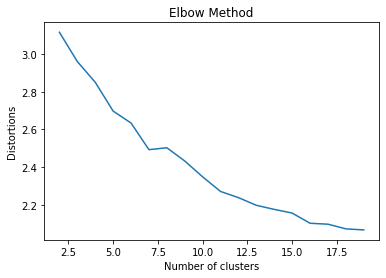

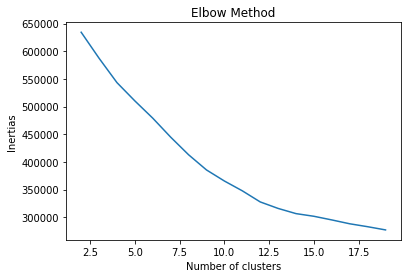

In [78]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(churn_norm_back_df)
    distortions.append(sum(np.min(cdist(churn_norm_back_df, kmeans.cluster_centers_, 'euclidean'),axis=1)) / churn_norm_back_df.shape[0]) 
    inertias.append(kmeans.inertia_) 
    mapping1[i] = sum(np.min(cdist(churn_norm_back_df, kmeans.cluster_centers_, 'euclidean'),axis=1)) / churn_norm_back_df.shape[0] 
    mapping2[i] = kmeans.inertia_

plt.plot(range(2, 20), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

plt.plot(range(2, 20), inertias)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.show()

In [79]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(churn_norm_back_df)

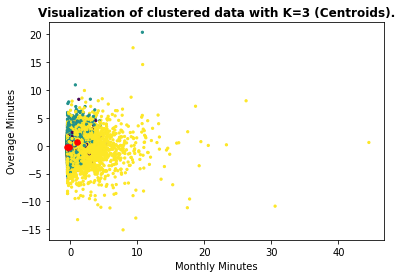

In [80]:
plt.scatter(churn_norm_back_df.iloc[:,1], churn_norm_back_df.iloc[:,2], c=pred_y, s=5, cmap='viridis')
plt.xlabel('Monthly Minutes')
plt.ylabel('Overage Minutes')
plt.title('Visualization of clustered data with K=3 (Centroids).', fontweight='bold')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=30, alpha=1);

### Clustering with expectation Maximization Method

In [190]:
gmm = GaussianMixture(n_components=2)
gmm.fit(churn_norm_back_df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [191]:
pred_gmm = gmm.fit_predict(churn_norm_back_df)
pred_gmm

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

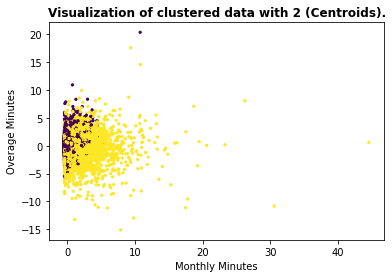

In [192]:
plt.scatter(churn_norm_back_df.iloc[:,1], churn_norm_back_df.iloc[:,2], c=pred_gmm, s=5, cmap='viridis')
plt.xlabel('Monthly Minutes')
plt.ylabel('Overage Minutes')
plt.title('Visualization of clustered data with 2 (Centroids).', fontweight='bold');

### Performing Feature Transformation using Principal Component Analysis.

In [84]:
pca_model = PCA(n_components=14)
pcs = pca_model.fit_transform(x_churn_norm_back_df)
pca_df = pd.DataFrame(data = pcs, columns = 
                      ['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7','PC8','PC9','PC10', 'PC11','PC12','PC13','PC14'])

In [85]:
pca = np.asarray(pca_df)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.131571,-0.115795,-0.983085,-1.259549,-2.396093,-0.450381,-0.048319,4.851447,-0.042022,1.103732,0.761728,0.049958,-0.132811,0.560749
1,1.846694,-1.001321,-0.497648,-1.507353,0.435356,2.223432,0.758705,-0.150095,-0.526920,-0.408133,-1.350457,0.053865,0.143100,0.127828
2,1.593697,-0.741919,-0.307465,-0.916959,0.132608,3.101945,-1.695925,-0.357683,-0.308319,-0.751102,-1.528518,0.066240,0.222919,0.138728
3,-1.284375,1.425809,1.005735,0.052564,-0.615849,-0.986359,0.425670,-0.356504,-0.136836,1.722366,-1.422211,-0.451384,-0.597889,-0.495227
4,1.305043,0.673692,-0.193229,-0.399936,-1.017773,1.914306,1.087724,-0.506897,-0.866151,2.005920,-1.278504,0.171985,0.508388,-0.398072


#### Checking for optimal number of PCs based on variation in data explained by each PCs. 

In [86]:
variance = np.var(pca_df, axis=0)
variance_ratio = variance/np.sum(variance)
variance_ratio 

PC1     0.144871
PC2     0.128759
PC3     0.113859
PC4     0.091168
PC5     0.085541
PC6     0.071530
PC7     0.070206
PC8     0.067351
PC9     0.060337
PC10    0.049012
PC11    0.046447
PC12    0.028077
PC13    0.026985
PC14    0.015857
dtype: float64

### Based on the above result, even with the PC14 feature we are able to explain 3 % variation in data. Hence, selecting all the features for our futher analysis.

#### Plotting the PCs.

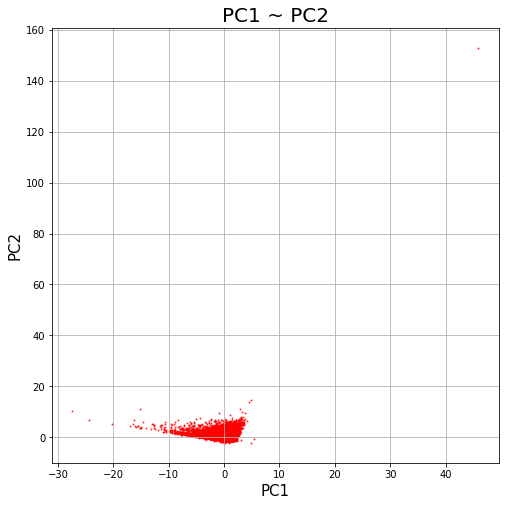

In [87]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PC1 ~ PC2', fontsize = 20)
ax.scatter(pca_df['PC1'], pca_df['PC2'], c = 'r', s = 1, alpha=0.7)
ax.grid()

### Performing K-Means Clustering on PCA dataset

In [88]:
pca_df = pd.concat([pca_df, churn_norm_df['Churn']], axis=1)

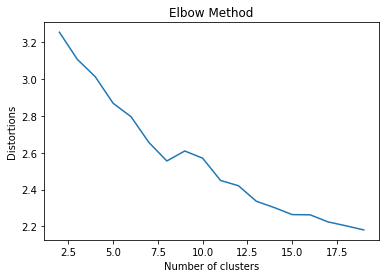

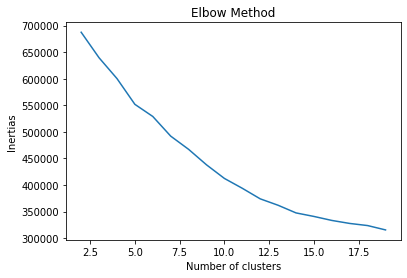

In [89]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
for i in range(2, 20):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    k_pca_class = kmeans_pca.fit(pca_df)
    distortions.append(sum(np.min(cdist(pca_df, kmeans_pca.cluster_centers_, 'euclidean'),axis=1)) / pca_df.shape[0]) 
    inertias.append(kmeans_pca.inertia_) 
    mapping1[i] = sum(np.min(cdist(pca_df, kmeans_pca.cluster_centers_, 'euclidean'),axis=1)) / pca_df.shape[0] 
    mapping2[i] = kmeans_pca.inertia_

plt.plot(range(2, 20), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

plt.plot(range(2, 20), inertias)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.show()

#### Choosing 3 as the number of clusters.

In [90]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_pca = kmeans_pca.fit_predict(pca_df)
pred_pca

array([1, 3, 3, ..., 3, 1, 1])

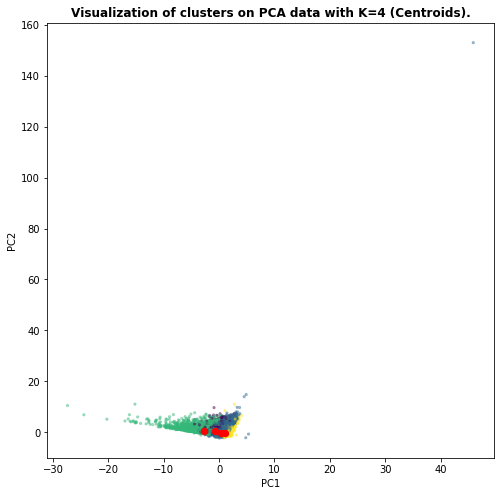

In [235]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pred_pca, s=5, alpha=0.4)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualization of clusters on PCA data with K=4 (Centroids).', fontweight='bold')

centers = kmeans_pca.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=40, alpha=1);

### Performing Expectation Maximization on PCA dataset

In [92]:
gmm = GaussianMixture(n_components=3)
gmm.fit(pca_df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [93]:
pred_gmm = gmm.fit_predict(pca_df)
pred_gmm

array([2, 0, 0, ..., 0, 1, 0], dtype=int64)

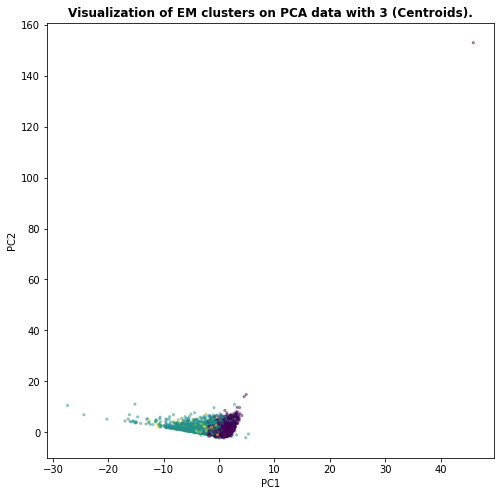

In [94]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pred_gmm, s=5, alpha=0.4)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualization of EM clusters on PCA data with 3 (Centroids).', fontweight='bold');

### Performing Feature Transformation using Independent Component Analysis.

In [236]:
ica = FastICA(n_components=14)
ica_ = ica.fit_transform(x_churn_norm_back_df)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

In [237]:
ica_df = pd.DataFrame(data = ica_, columns = ['IC1', 'IC2', 'IC3','IC4', 'IC5', 'IC6','IC7','IC8','IC9','IC10', 
                                             'IC11','IC12','IC13','IC14'])
ica_df.head()

,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14
0,0.001760,0.001074,-0.001810,0.003636,0.003382,-0.024437,-0.001532,0.001215,-0.003548,-0.001205,-0.004198,0.007067,0.001607,-0.002278
1,-0.013642,-0.000389,-0.000314,0.004376,0.002075,0.000859,-0.002188,0.000891,-0.002477,-0.001046,0.001067,-0.006378,-0.000238,-0.001939
2,-0.013685,-0.000522,-0.000374,0.002423,0.002133,0.000879,-0.002953,0.001057,-0.003539,-0.001133,0.001342,-0.008356,-0.000346,0.010092
3,0.001052,0.013015,-0.000042,-0.001459,0.001389,0.000837,0.007147,0.003304,0.005590,0.000850,0.000939,0.002281,-0.002518,-0.001958
4,-0.013794,0.009929,-0.000363,-0.000028,0.001755,0.000882,-0.004049,0.000927,0.005013,-0.001039,0.000957,0.004470,-0.000389,-0.001963


### Plotting the IC1~IC2 chart

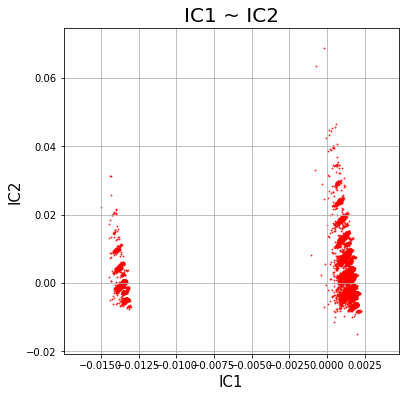

In [238]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('IC1', fontsize = 15)
ax.set_ylabel('IC2', fontsize = 15)
ax.set_title('IC1 ~ IC2', fontsize = 20)
ax.scatter(ica_df['IC1'], ica_df['IC2'], c = 'r', s = 1, alpha=0.7)
ax.grid()

### K-Means on ICA dataset

In [239]:
ica_df = pd.concat([ica_df, churn_norm_df['Churn']], axis=1)

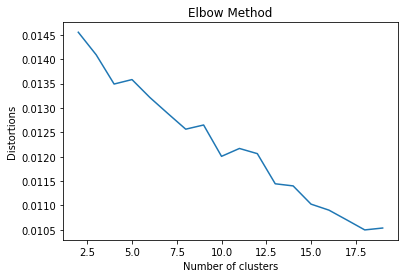

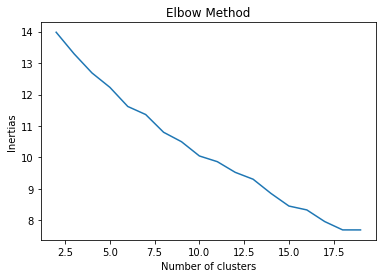

In [240]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
for i in range(2, 20):
    kmeans_ica = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    k_ica_class = kmeans_ica.fit(ica_df)
    distortions.append(sum(np.min(cdist(ica_df, kmeans_ica.cluster_centers_, 'euclidean'),axis=1)) / ica_df.shape[0]) 
    inertias.append(kmeans_ica.inertia_) 
    mapping1[i] = sum(np.min(cdist(ica_df, kmeans_ica.cluster_centers_, 'euclidean'),axis=1)) / ica_df.shape[0] 
    mapping2[i] = kmeans_ica.inertia_

plt.plot(range(2, 20), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

plt.plot(range(2, 20), inertias)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.show()

### Choosing 3 as the number of clusters

In [241]:
kmeans_ica = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_ica = kmeans_ica.fit_predict(ica_df)
pred_ica

array([1, 1, 2, ..., 2, 1, 2])

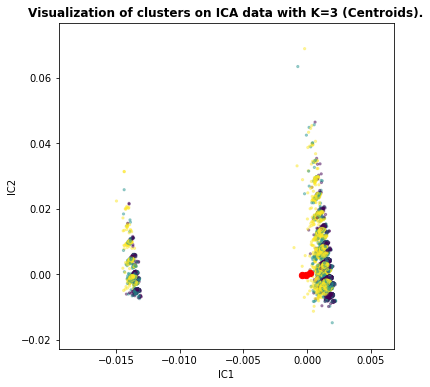

In [243]:
fig = plt.figure(figsize = (6,6))
plt.scatter(ica_df['IC1'], ica_df['IC2'], c=pred_ica, s=5, alpha=0.4)
plt.xlabel('IC1')
plt.ylabel('IC2')
plt.title('Visualization of clusters on ICA data with K=3 (Centroids).', fontweight='bold')

centers = kmeans_ica.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=40, alpha=1);

### Performing Expectation Maximization on ICA Dataset

In [244]:
gmm_ida = GaussianMixture(n_components=3)
gmm_ida.fit(ica_df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [245]:
pred_gmm_ida = gmm_ida.fit_predict(ica_df)
pred_gmm_ida

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

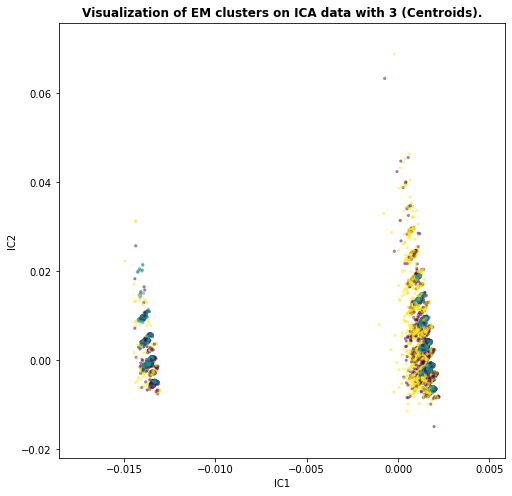

In [246]:
fig = plt.figure(figsize = (8,8))
plt.scatter(ica_df['IC1'], ica_df['IC2'], c=pred_gmm_ida, s=5, alpha=0.4)
plt.xlabel('IC1')
plt.ylabel('IC2')
plt.title('Visualization of EM clusters on ICA data with 3 (Centroids).', fontweight='bold');

### Feature Transformation using Randomized Projection

In [247]:
rp = GRP(n_components=14)
rp_ = rp.fit_transform(x_churn_norm_back_df)  # Reconstruct signals

In [248]:
rp_df = pd.DataFrame(data = rp_, columns = ['RP1', 'RP2', 'RP3','RP4', 'RP5', 'RP6','RP7','RP8','RP9','RP10', 
                                             'RP11','RP12','RP13','RP14'])
rp_df.head()

,RP1,RP2,RP3,RP4,RP5,RP6,RP7,RP8,RP9,RP10,RP11,RP12,RP13,RP14
0,-0.306898,-1.099766,1.160941,1.060538,-1.699643,1.665880,-0.880644,0.388300,-0.383754,-0.518274,-2.946481,-2.688794,1.264318,-2.966664
1,0.083644,-1.518024,0.455768,-0.704937,-1.332136,0.836385,0.454038,0.308977,-0.116774,0.415595,-0.332498,1.121764,0.423590,0.076511
2,-0.578499,-1.518493,-0.528984,-0.963426,-0.058800,1.167575,-0.010893,0.471017,-0.420918,0.660903,-0.339266,1.168338,-0.627501,-0.324438
3,-0.996036,-0.711428,-1.145366,0.305860,-0.360868,0.698710,0.458472,-0.103645,1.045524,-0.380787,-0.149686,0.023670,1.795796,-0.299227
4,-0.174282,-2.254070,-0.981252,-0.140823,-1.594189,2.769420,1.594093,-0.656336,-0.309972,-0.044992,-1.639324,-0.526328,2.181550,-0.486717


In [249]:
rp_df = pd.concat([rp_df, churn_norm_df['Churn']], axis=1)

### Performing clustering on Randomized Projection Dataset

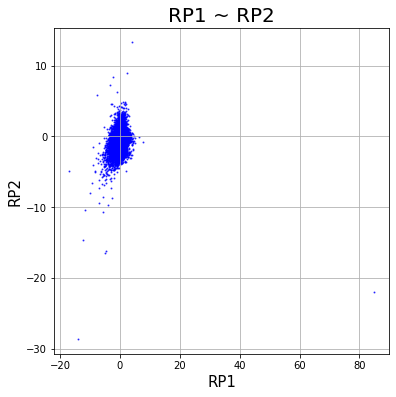

In [251]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('RP1', fontsize = 15)
ax.set_ylabel('RP2', fontsize = 15)
ax.set_title('RP1 ~ RP2', fontsize = 20)
ax.scatter(rp_df['RP1'], rp_df['RP2'], c = 'blue', s = 1, alpha=0.7)
ax.grid()

### K-Means on RP dataset

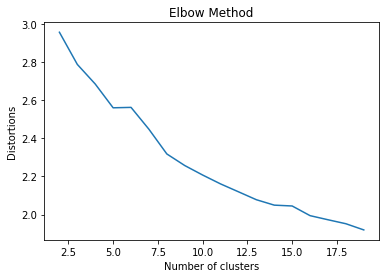

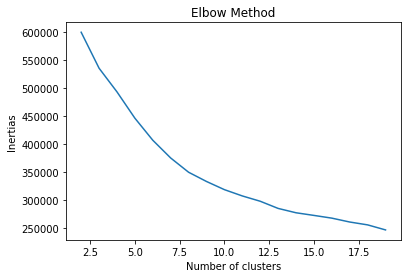

In [109]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
for i in range(2, 20):
    kmeans_rp = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    k_rp_class = kmeans_rp.fit(rp_df)
    distortions.append(sum(np.min(cdist(rp_df, kmeans_rp.cluster_centers_, 'euclidean'),axis=1)) / rp_df.shape[0]) 
    inertias.append(kmeans_rp.inertia_) 
    mapping1[i] = sum(np.min(cdist(rp_df, kmeans_rp.cluster_centers_, 'euclidean'),axis=1)) / rp_df.shape[0] 
    mapping2[i] = kmeans_rp.inertia_

plt.plot(range(2, 20), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

plt.plot(range(2, 20), inertias)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.show()

### Choosing 4 as the number of clusters

In [252]:
kmeans_rp = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_rp = kmeans_rp.fit_predict(rp_df)
pred_rp

array([2, 2, 1, ..., 2, 0, 1])

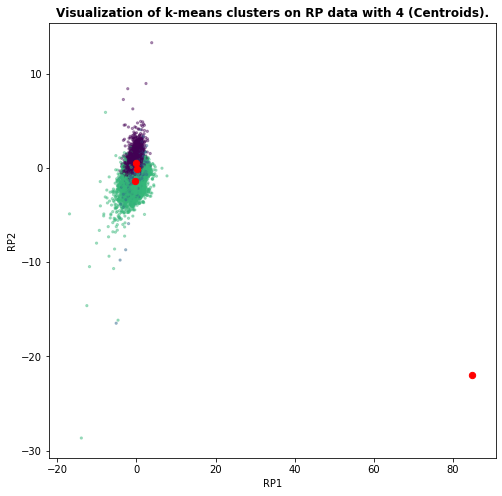

In [253]:
fig = plt.figure(figsize = (8,8))
plt.scatter(rp_df['RP1'], rp_df['RP2'], c=pred_rp, s=5, alpha=0.4)
plt.xlabel('RP1')
plt.ylabel('RP2')
plt.title('Visualization of k-means clusters on RP data with 4 (Centroids).', fontweight='bold')

centers = kmeans_rp.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=40, alpha=1);

### Expectation Maximization on rp dataset

In [254]:
gmm_rp = GaussianMixture(n_components=3)
gmm_rp.fit(rp_df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [255]:
pred_gmm_rp = gmm_ida.fit_predict(rp_df)
pred_gmm_rp

array([1, 0, 0, ..., 0, 2, 2], dtype=int64)

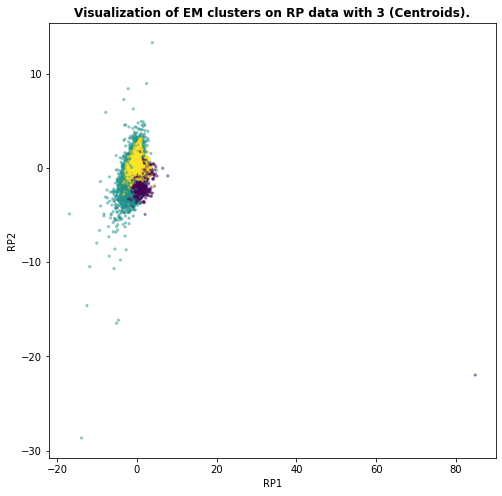

In [256]:
fig = plt.figure(figsize = (8,8))
plt.scatter(rp_df['RP1'], rp_df['RP2'], c=pred_gmm_rp, s=5, alpha=0.4)
plt.xlabel('RP1')
plt.ylabel('RP2')
plt.title('Visualization of EM clusters on RP data with 3 (Centroids).', fontweight='bold');

### Spliting the PCA dataset to train and test.

In [115]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,Churn
0,0.131571,-0.115795,-0.983085,-1.259549,-2.396093,-0.450381,-0.048319,4.851447,-0.042022,1.103732,0.761728,0.049958,-0.132811,0.560749,1.578397
1,1.846694,-1.001321,-0.497648,-1.507353,0.435356,2.223432,0.758705,-0.150095,-0.526920,-0.408133,-1.350457,0.053865,0.143100,0.127828,1.578397
2,1.593697,-0.741919,-0.307465,-0.916959,0.132608,3.101945,-1.695925,-0.357683,-0.308319,-0.751102,-1.528518,0.066240,0.222919,0.138728,-0.633554
3,-1.284375,1.425809,1.005735,0.052564,-0.615849,-0.986359,0.425670,-0.356504,-0.136836,1.722366,-1.422211,-0.451384,-0.597889,-0.495227,-0.633554
4,1.305043,0.673692,-0.193229,-0.399936,-1.017773,1.914306,1.087724,-0.506897,-0.866151,2.005920,-1.278504,0.171985,0.508388,-0.398072,1.578397


In [125]:
y_pca = y_churn_df['Churn']
x_pca = pca_df.iloc[:,0:14]
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y_pca, test_size=0.3, random_state=16)
pca_train_x = np.asarray(x_train_pca)
pca_test_x = np.asarray(x_test_pca)
pca_train_y = np.asarray(y_train_pca)
pca_test_y = np.asarray(y_test_pca)
pca_train_y[1]

0

### Implementing the Neural Network algorithm on the PCA Dataset.

In [126]:
strategy = tf.distribute.MirroredStrategy()
print ('Number of devices: {}'.format(strategy.num_replicas_in_sync))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of devices: 1


In [138]:
# Call the distribution scope context manager
with strategy.scope():
    # Define a model to fit the above data
    model_3 = tf.keras.Sequential([
        tf.keras.layers.Dense(units=14, input_dim=14),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    
    # Compile the model
    model_3.compile(loss='binary_crossentropy', optimizer='sgd')

In [139]:
model2h_tanh_fit = model_3.fit(pca_train_x, pca_train_y, validation_split=0.25, epochs=50, batch_size=15, verbose=1)

Train on 26132 samples, validate on 8711 samples
Epoch 1/50
26132/26132 [==============================] - 5s 208us/sample - loss: 0.6053 - val_loss: 0.5901
Epoch 2/50
26132/26132 [==============================] - 5s 192us/sample - loss: 0.5905 - val_loss: 0.5879
Epoch 3/50
26132/26132 [==============================] - 6s 230us/sample - loss: 0.5878 - val_loss: 0.5875
Epoch 4/50
26132/26132 [==============================] - 6s 226us/sample - loss: 0.5868 - val_loss: 0.5862
Epoch 5/50
26132/26132 [==============================] - 6s 223us/sample - loss: 0.5869 - val_loss: 0.5862
Epoch 6/50
26132/26132 [==============================] - 6s 222us/sample - loss: 0.5859 - val_loss: 0.5855
Epoch 7/50
26132/26132 [==============================] - 6s 225us/sample - loss: 0.5854 - val_loss: 0.5855
Epoch 8/50
26132/26132 [==============================] - 6s 230us/sample - loss: 0.5843 - val_loss: 0.5852
Epoch 9/50
26132/26132 [==============================] - 6s 244us/sample - loss: 0.584

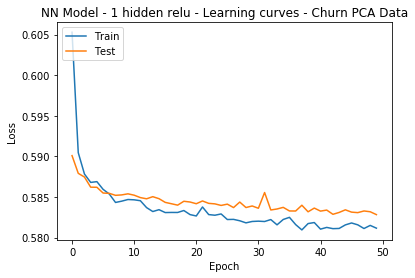

In [257]:
plt.plot(model2h_tanh_fit.history['loss'])
plt.plot(model2h_tanh_fit.history['val_loss'])
plt.title('NN Model - 1 hidden relu - Learning curves - Churn PCA Data')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [141]:
nn_predict_pca = model_3.predict_classes(x_test_pca)

In [142]:
print("Neural Network Accuracy: ", metrics.accuracy_score(y_test_pca, nn_predict_pca))

Neural Network Accuracy:  0.7074934708364026


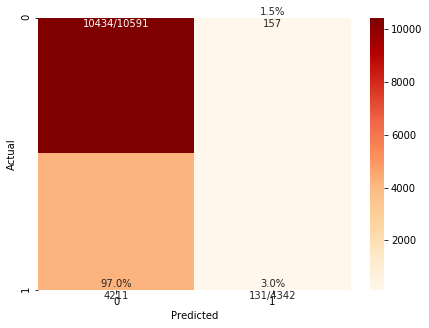

In [143]:
plot_cm(y_test_pca, nn_predict_pca)

In [258]:
print('Report Churn PCA NN - 1 Hidden Layer relu')
print(classification_report(y_test_pca, nn_predict_pca))

Report Churn PCA NN - 1 Hidden Layer relu
              precision    recall  f1-score   support

           0       0.71      0.99      0.83     10591
           1       0.45      0.03      0.06      4342

    accuracy                           0.71     14933
   macro avg       0.58      0.51      0.44     14933
weighted avg       0.64      0.71      0.60     14933



### Implementing the Neural Network algorithm on the ICA Dataset.

In [145]:
y_ica = y_churn_df['Churn']
x_ica = ica_df.iloc[:,0:14]
x_train_ica, x_test_ica, y_train_ica, y_test_ica = train_test_split(x_ica, y_churn_df, test_size=0.3, random_state=16)
ica_train_x = np.asarray(x_train_ica)
ica_test_x = np.asarray(x_test_ica)
ica_train_y = np.asarray(y_train_ica)
ica_test_y = np.asarray(y_test_ica)
y_train_ica.head()

,Churn
9599,0
41432,0
36884,1
48275,0
44382,0


In [146]:
# Call the distribution scope context manager
with strategy.scope():
    # Define a model to fit the above data
    model_5 = tf.keras.Sequential([
        tf.keras.layers.Dense(units=14, input_dim=14),
        tf.keras.layers.Dense(units=64, activation='tanh'),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(units=128, activation='tanh'),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    
    # Compile the model
    model_5.compile(loss='binary_crossentropy', optimizer='sgd')

In [147]:
model2h_tanh_fit_ica = model_5.fit(ica_train_x, ica_train_y, validation_split=0.25, epochs=50, batch_size=15, verbose=1)

Train on 26132 samples, validate on 8711 samples
Epoch 1/50
26132/26132 [==============================] - 6s 223us/sample - loss: 0.6001 - val_loss: 0.5991
Epoch 2/50
26132/26132 [==============================] - 6s 212us/sample - loss: 0.5973 - val_loss: 0.5988
Epoch 3/50
26132/26132 [==============================] - 6s 235us/sample - loss: 0.5974 - val_loss: 0.5988
Epoch 4/50
26132/26132 [==============================] - 7s 269us/sample - loss: 0.5973 - val_loss: 0.5988
Epoch 5/50
26132/26132 [==============================] - 7s 263us/sample - loss: 0.5975 - val_loss: 0.5989
Epoch 6/50
26132/26132 [==============================] - 7s 271us/sample - loss: 0.5969 - val_loss: 0.5989
Epoch 7/50
26132/26132 [==============================] - 7s 271us/sample - loss: 0.5970 - val_loss: 0.5988
Epoch 8/50
26132/26132 [==============================] - 7s 281us/sample - loss: 0.5970 - val_loss: 0.5990
Epoch 9/50
26132/26132 [==============================] - 8s 302us/sample - loss: 0.597

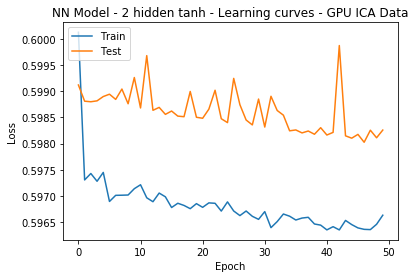

In [148]:
plt.plot(model2h_tanh_fit_ica.history['loss'])
plt.plot(model2h_tanh_fit_ica.history['val_loss'])
plt.title('NN Model - 2 hidden tanh - Learning curves - GPU ICA Data')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [149]:
nn_predict_ica = model_5.predict_classes(x_test_ica)

In [150]:
print("Neural Network Accuracy: ", metrics.accuracy_score(y_test_ica, nn_predict_ica))

Neural Network Accuracy:  0.709234581129043


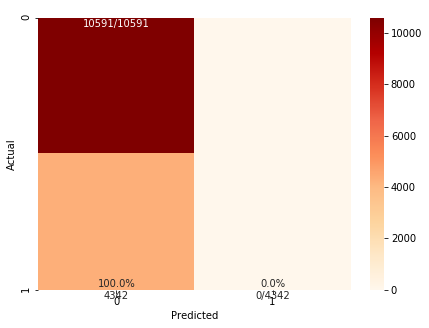

In [151]:
plot_cm(y_test_ica, nn_predict_ica)

In [260]:
print('Report Churn PCA NN - 1 Hidden Layer relu')
print(classification_report(y_test_ica, nn_predict_ica))

Report Churn PCA NN - 1 Hidden Layer relu
              precision    recall  f1-score   support

           0       0.71      1.00      0.83     10591
           1       0.00      0.00      0.00      4342

    accuracy                           0.71     14933
   macro avg       0.35      0.50      0.41     14933
weighted avg       0.50      0.71      0.59     14933



### Neural Network on Randomized Projection data

In [153]:
y_rp = y_churn_df['Churn']
x_rp = rp_df.iloc[:,0:14]
x_train_rp, x_test_rp, y_train_rp, y_test_rp = train_test_split(x_rp, y_rp, test_size=0.3, random_state=16)
rp_train_x = np.asarray(x_train_rp)
rp_test_x = np.asarray(x_test_rp)
rp_train_y = np.asarray(y_train_rp)
rp_test_y = np.asarray(y_test_rp)

In [154]:
# Call the distribution scope context manager
with strategy.scope():
    # Define a model to fit the above data
    model_5 = tf.keras.Sequential([
        tf.keras.layers.Dense(units=14, input_dim=14),
        tf.keras.layers.Dense(units=64, activation='tanh'),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(units=128, activation='tanh'),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    
    # Compile the model
    model_5.compile(loss='binary_crossentropy', optimizer='sgd')

In [155]:
model2h_tanh_fit_rp = model_5.fit(rp_train_x, rp_train_y, validation_split=0.25, epochs=50, batch_size=15, verbose=1)

Train on 26132 samples, validate on 8711 samples
Epoch 1/50
26132/26132 [==============================] - 6s 211us/sample - loss: 0.6039 - val_loss: 0.5914
Epoch 2/50
26132/26132 [==============================] - 5s 197us/sample - loss: 0.5958 - val_loss: 0.5910
Epoch 3/50
26132/26132 [==============================] - 5s 198us/sample - loss: 0.5936 - val_loss: 0.5912
Epoch 4/50
26132/26132 [==============================] - 5s 198us/sample - loss: 0.5918 - val_loss: 0.5904
Epoch 5/50
26132/26132 [==============================] - 5s 196us/sample - loss: 0.5913 - val_loss: 0.5940
Epoch 6/50
26132/26132 [==============================] - 5s 199us/sample - loss: 0.5909 - val_loss: 0.5895
Epoch 7/50
26132/26132 [==============================] - 5s 201us/sample - loss: 0.5909 - val_loss: 0.5905
Epoch 8/50
26132/26132 [==============================] - 5s 199us/sample - loss: 0.5902 - val_loss: 0.5902
Epoch 9/50
26132/26132 [==============================] - 5s 198us/sample - loss: 0.589

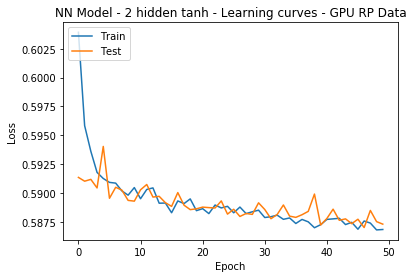

In [156]:
plt.plot(model2h_tanh_fit_rp.history['loss'])
plt.plot(model2h_tanh_fit_rp.history['val_loss'])
plt.title('NN Model - 2 hidden tanh - Learning curves - GPU RP Data')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [158]:
nn_predict_rp = model_5.predict_classes(x_test_rp)

In [159]:
print("Neural Network Accuracy: ", metrics.accuracy_score(y_test_rp, nn_predict_rp))

Neural Network Accuracy:  0.7086988548851537


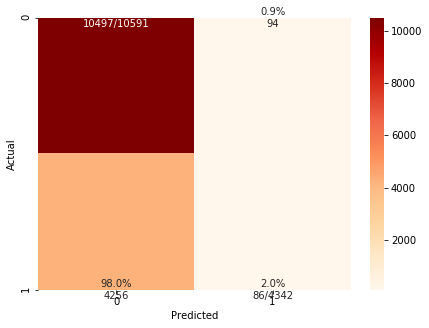

In [160]:
plot_cm(y_test_rp, nn_predict_rp)

In [161]:
print('Report Churn PCA NN - 2 Hidden Layer tanh')
print(classification_report(y_test_rp, nn_predict_rp))

Report Churn PCA NN - 2 Hidden Layer tanh
              precision    recall  f1-score   support

           0       0.71      0.99      0.83     10591
           1       0.48      0.02      0.04      4342

    accuracy                           0.71     14933
   macro avg       0.59      0.51      0.43     14933
weighted avg       0.64      0.71      0.60     14933



### Running Neural Networks on dataset with cluster information (untransformed)

### Running Best Neural Network with cluster from K-Means as an additional feature

In [216]:
churn_norm_back_df[churn_norm_back_df.isnull().any(axis=1)].count()
churn_norm_back_df.dropna(inplace=True)

In [217]:
x_churn_norm = churn_norm_back_df.iloc[:,0:14]
x_churn_norm['Cluster'] = pred_y
y_churn_norm = y_churn_df['Churn']
x_churn_norm.head()

,MonthlyMinutes,OverageMinutes,PercChangeMinutes,PercChangeRevenues,BlockedCalls,UniqueSubs,ActiveSubs,HandsetModels,AgeHH1,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,MadeCallToRetentionTeam,3-Good,Cluster
0,-0.579139,-0.413826,-0.568235,-0.452667,-0.311830,0.384028,-0.525425,0.487084,1.387959,-0.572308,-0.401295,0.328528,5.448673,-0.444915,1
1,-0.974595,-0.413826,0.029792,0.029661,-0.376417,-0.431718,-0.525425,-0.616521,0.391969,1.747309,-0.401295,-3.043881,-0.183531,-0.444915,0
2,-0.978380,-0.413826,0.037609,0.029661,-0.376417,-0.431718,-0.525425,-0.616521,-0.241842,1.747309,-0.401295,-3.043881,-0.183531,2.247619,0
3,1.488962,-0.413826,0.659088,0.235286,0.334044,0.384028,0.971373,2.694296,-0.060753,-0.572308,-0.401295,0.328528,-0.183531,-0.444915,2
4,-0.993517,-0.413826,0.045427,0.024584,-0.376417,0.384028,0.971373,1.590690,0.663603,-0.572308,-0.401295,-3.043881,-0.183531,-0.444915,0


In [218]:
x_train_km, x_test_km, y_train_km, y_test_km = train_test_split(x_churn_norm, churn_norm_back_df['Churn'], test_size=0.3, random_state=16)
km_train_x = np.asarray(x_train_km)
km_test_x = np.asarray(x_test_km)
km_train_y = np.asarray(y_train_km)
km_test_y = np.asarray(y_test_km)

In [219]:
# Call the distribution scope context manager
with strategy.scope():
    # Define a model to fit the above data
    model_6 = tf.keras.Sequential([
        tf.keras.layers.Dense(units=15, input_dim=15),
        tf.keras.layers.Dense(units=64, activation='tanh'),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(units=128, activation='tanh'),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    
    # Compile the model
    model_6.compile(loss='binary_crossentropy', optimizer='sgd')

In [220]:
nn_kmeans_untrans = model_6.fit(km_train_x, km_train_y, validation_split=0.25, epochs=50, batch_size=15, verbose=1)

Train on 25547 samples, validate on 8516 samples
Epoch 1/50
25547/25547 [==============================] - 9s 333us/sample - loss: 0.6125 - val_loss: 0.6026
Epoch 2/50
25547/25547 [==============================] - 9s 337us/sample - loss: 0.6046 - val_loss: 0.6006
Epoch 3/50
25547/25547 [==============================] - 8s 330us/sample - loss: 0.6022 - val_loss: 0.6011
Epoch 4/50
25547/25547 [==============================] - 8s 314us/sample - loss: 0.6010 - val_loss: 0.6005
Epoch 5/50
25547/25547 [==============================] - 8s 303us/sample - loss: 0.6009 - val_loss: 0.6004
Epoch 6/50
25547/25547 [==============================] - 8s 303us/sample - loss: 0.6001 - val_loss: 0.6002
Epoch 7/50
25547/25547 [==============================] - 8s 298us/sample - loss: 0.5992 - val_loss: 0.6000
Epoch 8/50
25547/25547 [==============================] - 8s 296us/sample - loss: 0.5995 - val_loss: 0.6002
Epoch 9/50
25547/25547 [==============================] - 6s 249us/sample - loss: 0.599

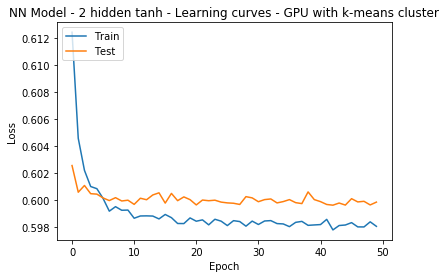

In [221]:
plt.plot(nn_kmeans_untrans.history['loss'])
plt.plot(nn_kmeans_untrans.history['val_loss'])
plt.title('NN Model - 2 hidden tanh - Learning curves - GPU with k-means cluster')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [222]:
nn_predict_km_un = model_6.predict_classes(km_test_x)

In [223]:
print("Neural Network Accuracy: ", metrics.accuracy_score(km_test_y, nn_predict_km_un))

Neural Network Accuracy:  0.7099116377834098


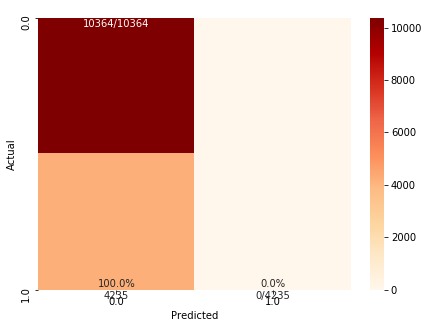

In [224]:
plot_cm(km_test_y, nn_predict_km_un)

In [261]:
print('Report GPU Kmeans Clustered NN - 1 Hidden Layer relu')
print(classification_report(km_test_y, nn_predict_km_un))

Report GPU Kmeans Clustered NN - 1 Hidden Layer relu
              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83     10364
         1.0       0.00      0.00      0.00      4235

    accuracy                           0.71     14599
   macro avg       0.35      0.50      0.42     14599
weighted avg       0.50      0.71      0.59     14599



### Running Best Neural Network with cluster from gmm as an additional feature

In [226]:
x_churn_norm_2 = churn_norm_back_df.iloc[:,0:14]
x_churn_norm_2['Cluster'] = pred_gmm
y_churn_norm_2 = y_churn_df['Churn']
x_churn_norm_2.head()

,MonthlyMinutes,OverageMinutes,PercChangeMinutes,PercChangeRevenues,BlockedCalls,UniqueSubs,ActiveSubs,HandsetModels,AgeHH1,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,MadeCallToRetentionTeam,3-Good,Cluster
0,-0.579139,-0.413826,-0.568235,-0.452667,-0.311830,0.384028,-0.525425,0.487084,1.387959,-0.572308,-0.401295,0.328528,5.448673,-0.444915,0
1,-0.974595,-0.413826,0.029792,0.029661,-0.376417,-0.431718,-0.525425,-0.616521,0.391969,1.747309,-0.401295,-3.043881,-0.183531,-0.444915,0
2,-0.978380,-0.413826,0.037609,0.029661,-0.376417,-0.431718,-0.525425,-0.616521,-0.241842,1.747309,-0.401295,-3.043881,-0.183531,2.247619,0
3,1.488962,-0.413826,0.659088,0.235286,0.334044,0.384028,0.971373,2.694296,-0.060753,-0.572308,-0.401295,0.328528,-0.183531,-0.444915,1
4,-0.993517,-0.413826,0.045427,0.024584,-0.376417,0.384028,0.971373,1.590690,0.663603,-0.572308,-0.401295,-3.043881,-0.183531,-0.444915,0


In [227]:
x_train_gmm, x_test_gmm, y_train_gmm, y_test_gmm = train_test_split(x_churn_norm_2, churn_norm_back_df['Churn'], test_size=0.3, random_state=16)
gmm_train_x = np.asarray(x_train_gmm)
gmm_test_x = np.asarray(x_test_gmm)
gmm_train_y = np.asarray(y_train_gmm)
gmm_test_y = np.asarray(y_test_gmm)

In [228]:
# Call the distribution scope context manager
with strategy.scope():
    # Define a model to fit the above data
    model_7 = tf.keras.Sequential([
        tf.keras.layers.Dense(units=15, input_dim=15),
        tf.keras.layers.Dense(units=64, activation='tanh'),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(units=128, activation='tanh'),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    
    # Compile the model
    model_7.compile(loss='binary_crossentropy', optimizer='sgd')

In [229]:
nn_gmm_untrans = model_7.fit(gmm_train_x, gmm_train_y, validation_split=0.25, epochs=50, batch_size=15, verbose=1)

Train on 25547 samples, validate on 8516 samples
Epoch 1/50
25547/25547 [==============================] - 8s 332us/sample - loss: 0.6106 - val_loss: 0.6001
Epoch 2/50
25547/25547 [==============================] - 7s 278us/sample - loss: 0.6028 - val_loss: 0.6006
Epoch 3/50
25547/25547 [==============================] - 7s 276us/sample - loss: 0.6009 - val_loss: 0.5998
Epoch 4/50
25547/25547 [==============================] - 7s 277us/sample - loss: 0.6011 - val_loss: 0.6002
Epoch 5/50
25547/25547 [==============================] - 7s 278us/sample - loss: 0.5998 - val_loss: 0.6011
Epoch 6/50
25547/25547 [==============================] - 7s 277us/sample - loss: 0.5996 - val_loss: 0.6000
Epoch 7/50
25547/25547 [==============================] - 7s 277us/sample - loss: 0.5994 - val_loss: 0.6003
Epoch 8/50
25547/25547 [==============================] - 7s 277us/sample - loss: 0.5990 - val_loss: 0.6003
Epoch 9/50
25547/25547 [==============================] - 7s 277us/sample - loss: 0.599

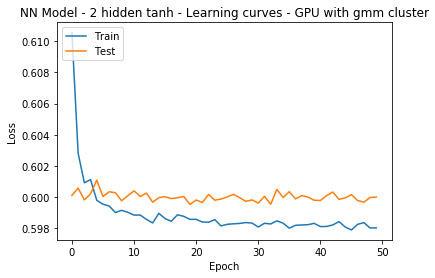

In [230]:
plt.plot(nn_gmm_untrans.history['loss'])
plt.plot(nn_gmm_untrans.history['val_loss'])
plt.title('NN Model - 2 hidden tanh - Learning curves - GPU with gmm cluster')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [231]:
nn_predict_gmm_un = model_7.predict_classes(gmm_test_x)

In [232]:
print("Neural Network Accuracy: ", metrics.accuracy_score(gmm_test_y, nn_predict_gmm_un))

Neural Network Accuracy:  0.7099116377834098


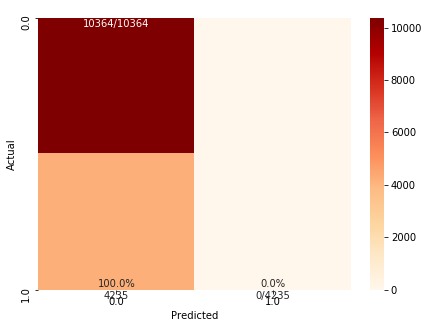

In [233]:
plot_cm(gmm_test_y, nn_predict_gmm_un)

In [262]:
print('Report CHURN Clustered NN - 1 Hidden Layer relu')
print(classification_report(gmm_test_y, nn_predict_gmm_un))

Report CHURN Clustered NN - 1 Hidden Layer relu
              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83     10364
         1.0       0.00      0.00      0.00      4235

    accuracy                           0.71     14599
   macro avg       0.35      0.50      0.42     14599
weighted avg       0.50      0.71      0.59     14599



### Confusion Matrix Defination 

In [135]:
print('Report GPU PCA NN - 2 Hidden Layer tanh')
print(classification_report(y_test_pca, nn_predict_pca))
def plot_cm(y_true, y_pred, figsize=(7,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sb.heatmap(cm, cmap='OrRd', annot=annot, fmt='', ax=ax)

Report GPU PCA NN - 2 Hidden Layer tanh
              precision    recall  f1-score   support

           0       0.71      0.99      0.83     10591
           1       0.48      0.03      0.05      4342

    accuracy                           0.71     14933
   macro avg       0.60      0.51      0.44     14933
weighted avg       0.64      0.71      0.60     14933

